# Fashion MNIST Clothing Classification

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


4422102/4422102 [==============================] - 1s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


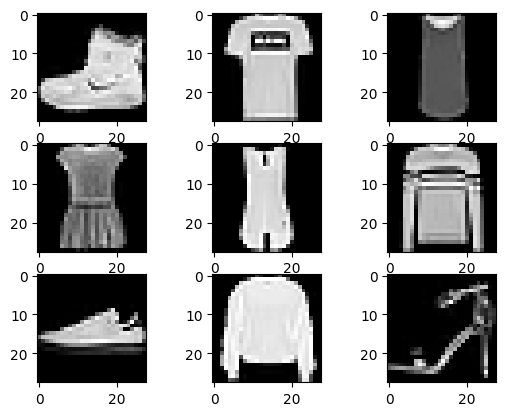

In [2]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [10]:
# baseline cnn model for fashion mnist
import numpy as np
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam


# Evaluation functions and graph functions

In [4]:
def plot_accuracy(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [5]:
def plot_loss(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [6]:
def plot_confusion_matrix(model, testX, testY):
    # Make predictions on test set
    y_pred = model.predict(testX)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(testY, axis=1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [7]:
def plot_roc_curve(model, testX, testY):
    # Make predictions on test set
    y_pred = model.predict(testX)

    # Calculate ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = testY.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(testY[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(10, 7))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class %d (AUC = %0.2f)' % (i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

In [8]:
def plot_precision_recall_curve(model, testX, testY):
    test_pred = model.predict(testX)
    precision = dict()
    recall = dict()
    pr_auc = dict()
    for i in range(10):
        precision[i], recall[i], _ = precision_recall_curve(testY[:, i], test_pred[:, i])
        pr_auc[i] = auc(recall[i], precision[i])
    # Plot precision-recall curve for each class
    plt.figure()
    plt.plot([0, 1], [1, 0], 'k--')
    for i in range(10):
        plt.plot(recall[i], precision[i], label='Class %d (AUC = %0.2f)' % (i, pr_auc[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Final Complex model hyperparameter tuning 

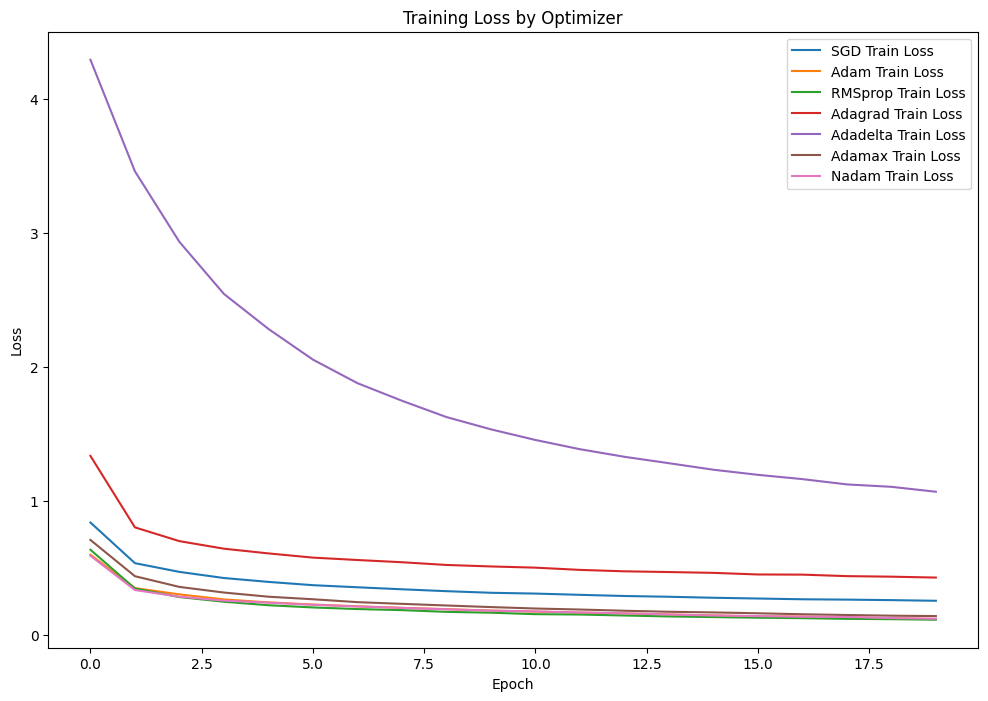

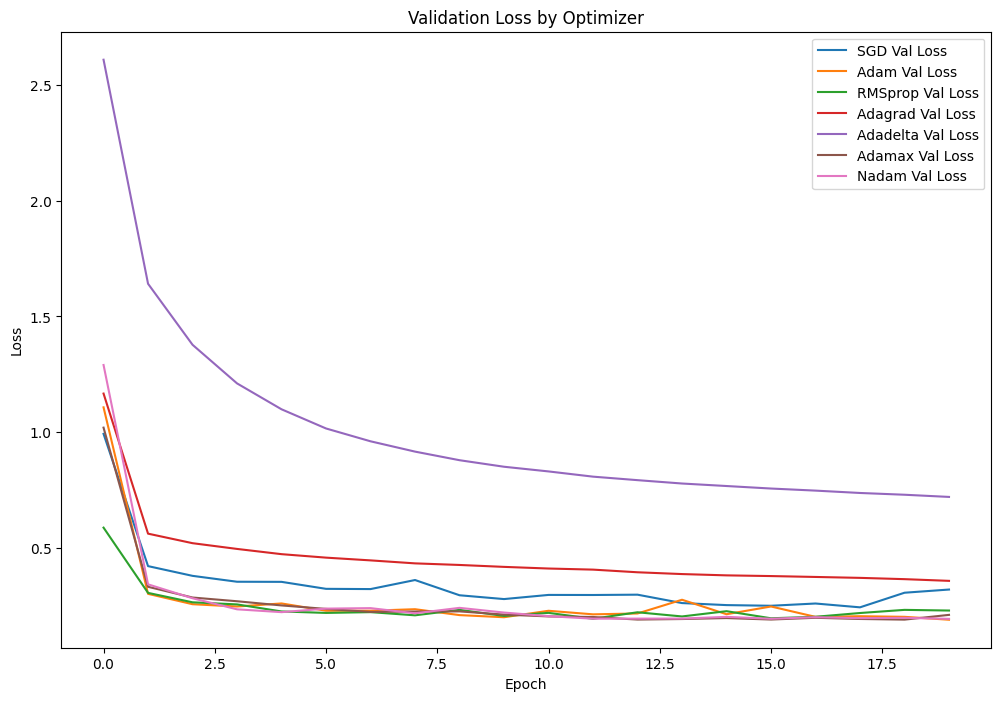

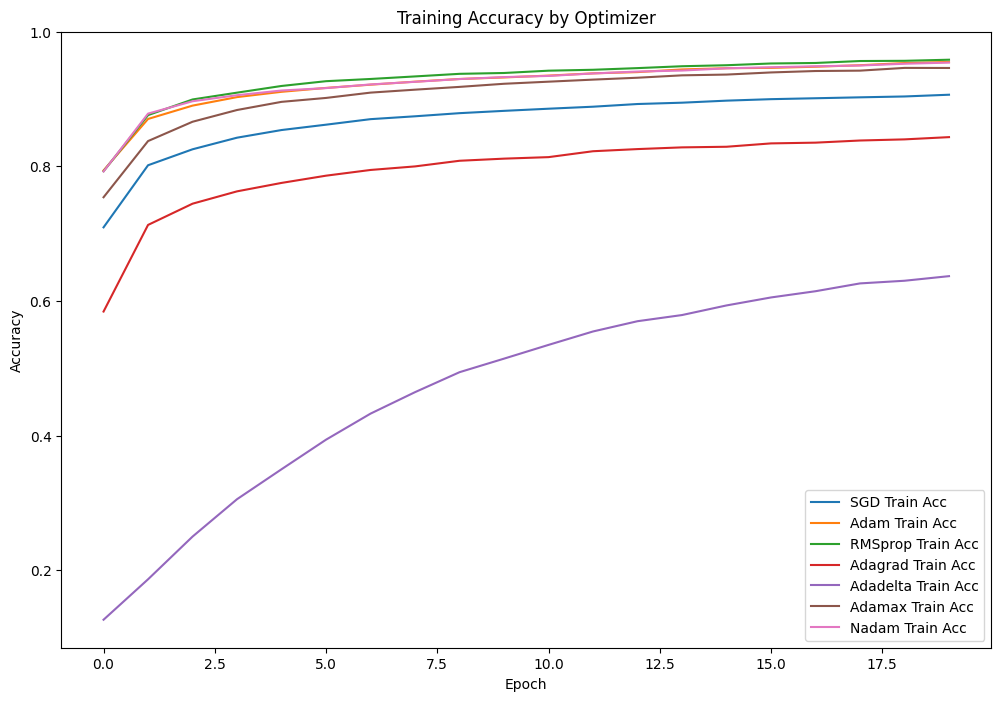

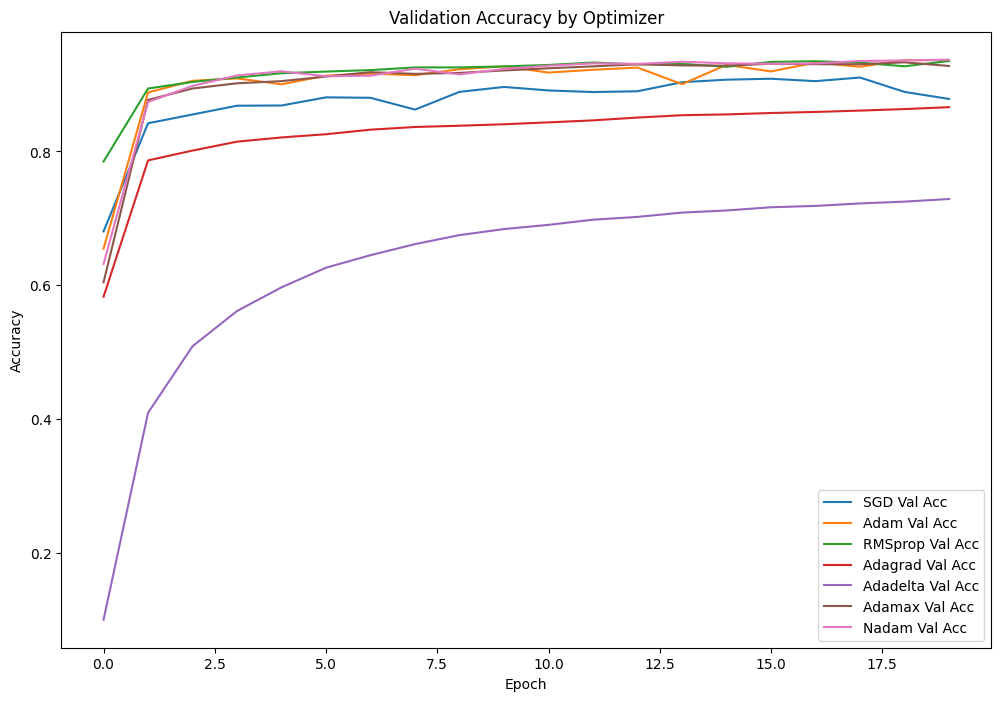

In [18]:

# load the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# one-hot encode the labels
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


# define the model
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # compile the model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


# test different optimizers
optimizers = ['SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for optimizer in optimizers:
    model = create_model(optimizer)
    history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, validation_data=(X_test.reshape(-1, 28, 28, 1), y_test), epochs=20, batch_size=128, verbose=0)
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])
    train_accs.append(history.history['accuracy'])
    val_accs.append(history.history['val_accuracy'])

# Plot the training and validation loss for each optimizer
plt.figure(figsize=(12,8))
for i in range(len(optimizers)):
    plt.plot(train_losses[i], label=optimizers[i]+' Train Loss')
plt.title('  by Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
for i in range(len(optimizers)):
    plt.plot(val_losses[i], label=optimizers[i]+' Val Loss')
plt.title('Validation Loss by Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy for each optimizer
plt.figure(figsize=(12,8))
for i in range(len(optimizers)):
    plt.plot(train_accs[i], label=optimizers[i]+' Train Acc')
plt.title('Training Accuracy by Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
for i in range(len(optimizers)):
    plt.plot(val_accs[i], label=optimizers[i]+' Val Acc')
plt.title('Validation Accuracy by Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
for i in range(len(optimizers)):
    optimizer = optimizers[i]
    print(f"\nOptimizer: {optimizer}")
    print(f"Initial Train Loss: {train_losses[i][0]}")
    print(f"Final Train Loss: {train_losses[i][-1]}")
    print(f"Initial Val Loss: {val_losses[i][0]}")
    print(f"Final Val Loss: {val_losses[i][-1]}")
    print(f"Initial Train Accuracy: {train_accs[i][0]}")
    print(f"Final Train Accuracy: {train_accs[i][-1]}")
    print(f"Initial Val Accuracy: {val_accs[i][0]}")
    print(f"Final Val Accuracy: {val_accs[i][-1]}")



Optimizer: SGD
Initial Train Loss: 0.8393765091896057
Final Train Loss: 0.2554943561553955
Initial Val Loss: 0.9935275316238403
Final Val Loss: 0.3219272494316101
Initial Train Accuracy: 0.7093999981880188
Final Train Accuracy: 0.9064833521842957
Initial Val Accuracy: 0.6805999875068665
Final Val Accuracy: 0.8784999847412109

Optimizer: Adam
Initial Train Loss: 0.5992497205734253
Final Train Loss: 0.1198728084564209
Initial Val Loss: 1.108046054840088
Final Val Loss: 0.19169878959655762
Initial Train Accuracy: 0.7939833402633667
Final Train Accuracy: 0.9551833271980286
Initial Val Accuracy: 0.6547999978065491
Final Val Accuracy: 0.9366999864578247

Optimizer: RMSprop
Initial Train Loss: 0.636198878288269
Final Train Loss: 0.11420483887195587
Initial Val Loss: 0.5890034437179565
Final Val Loss: 0.23132212460041046
Initial Train Accuracy: 0.7927833199501038
Final Train Accuracy: 0.9585000276565552
Initial Val Accuracy: 0.7850000262260437
Final Val Accuracy: 0.9351999759674072

Optimizer

In [22]:
from prettytable import PrettyTable

# Define the headers for the table
table = PrettyTable(['Optimizer', 'Initial Train Loss', 'Final Train Loss', 'Initial Val Loss', 'Final Val Loss', 'Initial Train Accuracy', 'Final Train Accuracy', 'Initial Val Accuracy', 'Final Val Accuracy'])

# Populate the table with data
for i in range(len(optimizers)):
    optimizer = optimizers[i]
    initial_train_loss = round(train_losses[i][0], 4)
    final_train_loss = round(train_losses[i][-1], 4)
    initial_val_loss = round(val_losses[i][0], 4)
    final_val_loss = round(val_losses[i][-1], 4)
    initial_train_acc = round(train_accs[i][0], 4)
    final_train_acc = round(train_accs[i][-1], 4)
    initial_val_acc = round(val_accs[i][0], 4)
    final_val_acc = round(val_accs[i][-1], 4)
    table.add_row([optimizer, initial_train_loss, final_train_loss, initial_val_loss, final_val_loss, initial_train_acc, final_train_acc, initial_val_acc, final_val_acc])

# Print the table
print(table)

+-----------+--------------------+------------------+------------------+----------------+------------------------+----------------------+----------------------+--------------------+
| Optimizer | Initial Train Loss | Final Train Loss | Initial Val Loss | Final Val Loss | Initial Train Accuracy | Final Train Accuracy | Initial Val Accuracy | Final Val Accuracy |
+-----------+--------------------+------------------+------------------+----------------+------------------------+----------------------+----------------------+--------------------+
|    SGD    |       0.8394       |      0.2555      |      0.9935      |     0.3219     |         0.7094         |        0.9065        |        0.6806        |       0.8785       |
|    Adam   |       0.5992       |      0.1199      |      1.108       |     0.1917     |         0.794          |        0.9552        |        0.6548        |       0.9367       |
|  RMSprop  |       0.6362       |      0.1142      |      0.589       |     0.2313     | 